In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [0]:
jpmorgan = web.get_data_yahoo("JPM",
                            start = "2018-02-01",
                            end = "2018-12-30")

In [3]:
jpmorgan.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-01,116.989998,115.480003,115.769997,116.870003,13800600.0,111.370407
2018-02-02,116.919998,114.089996,116.489998,114.279999,16477300.0,108.902283
2018-02-05,114.589996,103.980003,113.000000,108.800003,30097600.0,103.680161
2018-02-06,112.480003,106.610001,106.849998,112.110001,33114800.0,106.834404
2018-02-07,114.449997,111.150002,111.550003,112.870003,21878300.0,107.558640


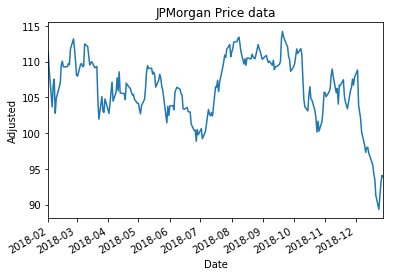

In [4]:
jpmorgan['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("JPMorgan Price data")
plt.show()

In [0]:
jpmorgan_daily_returns = jpmorgan['Adj Close'].pct_change() 

In [6]:
jpmorgan_daily_returns.head()

Date
2018-02-01         NaN
2018-02-02   -0.022161
2018-02-05   -0.047952
2018-02-06    0.030423
2018-02-07    0.006779
Name: Adj Close, dtype: float64

In [7]:
jpmorgan['Adj Close'].mean()

106.34957699171841

In [8]:
jpmorgan_daily_returns.mean()

-0.0006448897933795608

In [9]:
jpmorgan_daily_returns.std()

0.01438354436788868

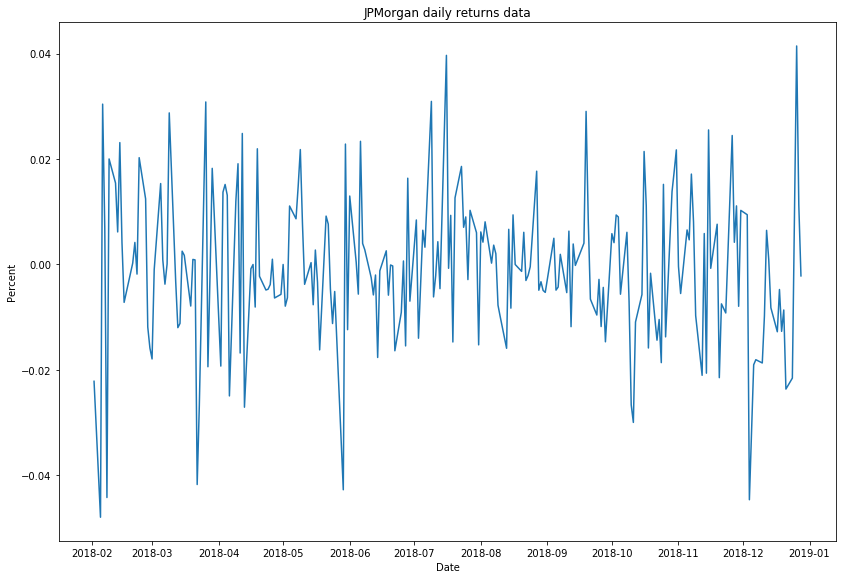

In [10]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,1.8,1.8])
ax1.plot(jpmorgan_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("JPMorgan daily returns data")
plt.show()

After looking at the daily returns chart for JPMorgan we can conclude that the returns are quite volatile and the stock can move +/- 5% on any given day. To get a sense of how extreme the returns can be we can plot a histogram.

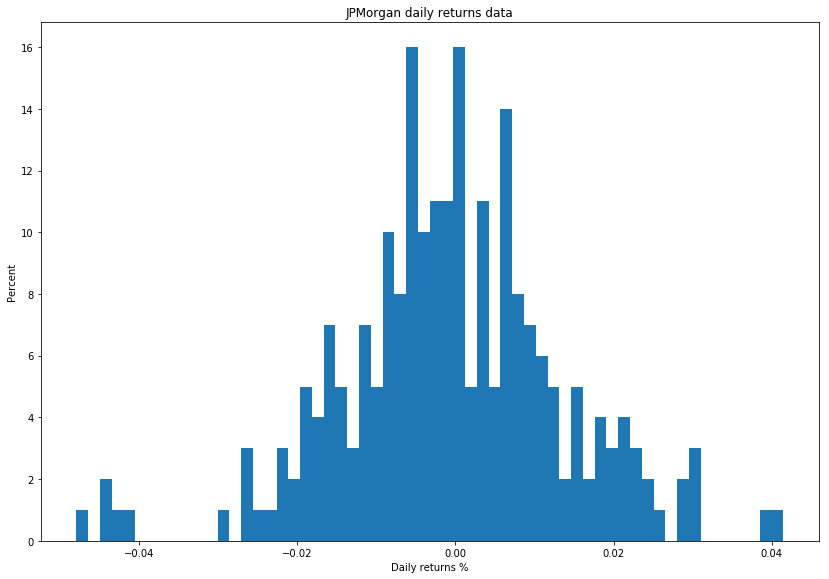

In [11]:
fig = plt.figure()
ax1 = fig.add_axes([0.4,0.4,1.8,1.8])
jpmorgan_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("JPMorgan daily returns data")
plt.show()

**Calculating the cumulative returns for the JP Morgan stock**

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or in other word, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the cumprod() function.

In [0]:
jpmorgan_cum_returns = (jpmorgan_daily_returns + 1).cumprod()

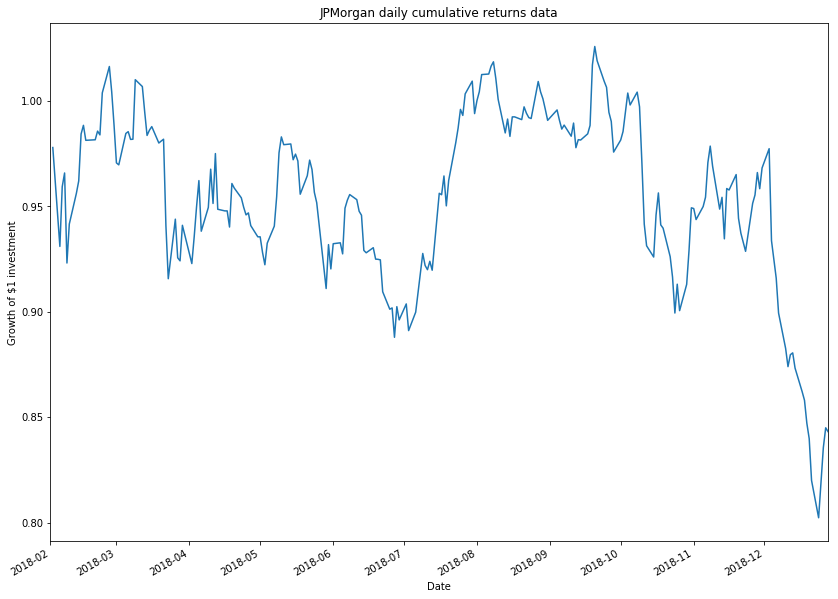

In [13]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,1.8,1.8])
jpmorgan_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("JPMorgan daily cumulative returns data")
plt.show()

**This chart shows the cumulative returns since 2018/02/01 for JPMorgan. With the power of hindsight, one could have made a loss of over 0.15  landing at about $0.83. That is quite a dissapointing performance for such a big company which didnt have many downsides as per the media reports.**



---

# Linear Regression: JPMorgan(JPM) and S&P 500(INX)

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
snp = web.get_data_yahoo("SPY",
                            start = "2018-02-01",
                            end = "2018-12-30")

In [16]:
snp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-01,283.059998,280.679993,281.070007,281.579987,90102500.0,272.529144
2018-02-02,280.230011,275.410004,280.079987,275.450012,173174800.0,266.596222
2018-02-05,275.850006,263.309998,273.450012,263.929993,294681800.0,255.446487
2018-02-06,269.700012,258.700012,259.940002,269.130005,355026800.0,260.479370
2018-02-07,272.359985,267.579987,268.500000,267.670013,167376100.0,259.066315


**Training a Linear Regression Model**

Will begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the 'JPMorgan Adj Close' column.

In [0]:
df_merge_asof = pd.merge_asof(snp,jpmorgan,
              on='Date')
            

In [18]:
df_merge_asof.head()

,Date,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
0,2018-02-01,283.059998,280.679993,281.070007,281.579987,90102500.0,272.529144,116.989998,115.480003,115.769997,116.870003,13800600.0,111.370407
1,2018-02-02,280.230011,275.410004,280.079987,275.450012,173174800.0,266.596222,116.919998,114.089996,116.489998,114.279999,16477300.0,108.902283
2,2018-02-05,275.850006,263.309998,273.450012,263.929993,294681800.0,255.446487,114.589996,103.980003,113.000000,108.800003,30097600.0,103.680161
3,2018-02-06,269.700012,258.700012,259.940002,269.130005,355026800.0,260.479370,112.480003,106.610001,106.849998,112.110001,33114800.0,106.834404
4,2018-02-07,272.359985,267.579987,268.500000,267.670013,167376100.0,259.066315,114.449997,111.150002,111.550003,112.870003,21878300.0,107.558640


In [19]:
dataset=df_merge_asof
dataset.head()

,Date,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
0,2018-02-01,283.059998,280.679993,281.070007,281.579987,90102500.0,272.529144,116.989998,115.480003,115.769997,116.870003,13800600.0,111.370407
1,2018-02-02,280.230011,275.410004,280.079987,275.450012,173174800.0,266.596222,116.919998,114.089996,116.489998,114.279999,16477300.0,108.902283
2,2018-02-05,275.850006,263.309998,273.450012,263.929993,294681800.0,255.446487,114.589996,103.980003,113.000000,108.800003,30097600.0,103.680161
3,2018-02-06,269.700012,258.700012,259.940002,269.130005,355026800.0,260.479370,112.480003,106.610001,106.849998,112.110001,33114800.0,106.834404
4,2018-02-07,272.359985,267.579987,268.500000,267.670013,167376100.0,259.066315,114.449997,111.150002,111.550003,112.870003,21878300.0,107.558640


In [0]:
X = dataset[[ 'Adj Close_x']]
y = dataset['Adj Close_y']



**Train Test Split**

The goal is to create a model that generalises well to new data. Our test set serves as a proxy for new data.Trained data is the data on which we apply the linear regression algorithm. And finally we test that algorithm on the test data.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and Training the **Model**

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The above code fits the linear regression model on the training data.
# Predictions from our Model
Let’s grab predictions off the test set and see how well it did!

In [0]:
predictions = lm.predict(X_test)

# Let’s visualise the prediction

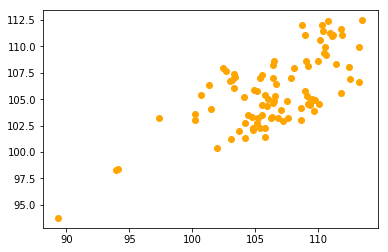

In [24]:
plt.scatter(y_test,predictions, c='orange')

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.4292295014832248

The model is a poor fit as seen with a r_2 score that is far from 1

In [0]:
!pip install pyEX

In [36]:
!pip install oandapy

  Created wheel for python-status: filename=python_status-1.0.1-cp36-none-any.whl size=4522 sha256=0d574b668da1be0f7d5c75a293834173e4c95f4e9c2f70531ceefc23ada229b0
  Stored in directory: /root/.cache/pip/wheels/83/f1/ec/43be0197cccd38dc4d2b862bbfb6c950fbffa3ae0daa74b97b
  Created wheel for pysimplemodel: filename=pysimplemodel-2.3.3-cp36-none-any.whl size=9073 sha256=7b115c11b35954a2112e127c23126ad64fccc58e31d06550df557e694bb80253
  Stored in directory: /root/.cache/pip/wheels/a8/f8/2b/471ea606495c6563a22ffdf2744655a7bd58ae7b48ef61dd49
Successfully built python-status pysimplemodel


In [38]:
import configparser
# v1 OANDA API
# pip install git+https://github.com/oanda/oandapy.git
# Note: You can request a v1 instead of v20 account by contacting Oanda chat support
import oandapy as opy

config = configparser.ConfigParser()
config.read('oanda.cfg')



[]

In [39]:
class MomentumTrader(opy.Streamer): 
    def __init__(self, momentum, *args, **kwargs): 
        opy.Streamer.__init__(self, *args, **kwargs)
        self.ticks = 0 
        self.position = 0
        self.df = pd.DataFrame()
        self.momentum = momentum
        self.units = 100000
    def create_order(self, side, units):
        order = oanda.create_order(config['oanda']['account_id'], 
            instrument='EUR_USD', units=units, side=side,
            type='market') 
        print('\n', order)
    def on_success(self, data):
        self.ticks += 1
        # print(self.ticks, end=', ')
        # appends the new tick data to the DataFrame object
        self.df = self.df.append(pd.DataFrame(data['tick'],
                                 index=[data['tick']['time']]))
        # transforms the time information to a DatetimeIndex object
        self.df.index = pd.DatetimeIndex(self.df['time'])
        # resamples the data set to a new, homogeneous interval
        dfr = self.df.resample('5s').last()
        # calculates the log returns
        dfr['returns'] = np.log(dfr['ask'] / dfr['ask'].shift(1))
        # derives the positioning according to the momentum strategy
        dfr['position'] = np.sign(dfr['returns'].rolling( 
                                      self.momentum).mean())
        if dfr['position'].ix[-1] == 1:
            # go long
            if self.position == 0:
                self.create_order('buy', self.units)
            elif self.position == -1:
                self.create_order('buy', self.units * 2)
            self.position = 1
        elif dfr['position'].ix[-1] == -1:
            # go short
            if self.position == 0:
                self.create_order('sell', self.units)
            elif self.position == 1:
                self.create_order('sell', self.units * 2)
            self.position = -1
        if self.ticks == 250:
            # close out the position
            if self.position == 1:
                self.create_order('sell', self.units)
            elif self.position == -1:
                self.create_order('buy', self.units)
            self.disconnect()

AttributeError: ignored

In [33]:
df = pyEX.chartDF(jpmorgan, timeframe)
df.head()

NameError: ignored